### Importing Libraries


In [482]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [563]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Capstone Project\Car prce prediction/Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [564]:
df.shape

(8128, 13)

In [565]:
## Checking for null values
df.isnull().sum()/len(df)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026452
torque           0.027313
seats            0.027190
dtype: float64

**Observation :**
- So we see that there are some missing values in some of the columns but it is less than 3% so we shall drop these rows because it will not impact much.

In [566]:
# dropping rows having any null values.
df.dropna(inplace = True)

In [567]:
df.shape

(7906, 13)

### Data Cleaning 

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


In [569]:
# Creating column Brand 
df['brand'] = df['name'].apply(lambda x: x.split()[0])

In [570]:
# creating feature age 
# subtracting year from 2022
df['age'] = df['year'].apply(lambda x: 2022-x)
df['age'].dtype

dtype('int64')

In [571]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [572]:
## Creating feature number of owner
df['number_of_owner'] = df['owner'].replace({'Test Drive Car': 0, 'First Owner': 1,
                                            'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4})
df.drop('owner', axis = 1, inplace = True)

In [573]:
## Creating Milage feature having only numerical values from mileage feature
df['Mileage'] = df['mileage'].apply(lambda x: x.split(' k')[0])
df['Mileage'] = df['Mileage'].astype('float64')
df['Mileage'].dtype

dtype('float64')

In [574]:
## Creating Engine feature having only numerical values form engine feature
df['Engine'] = df['engine'].apply(lambda x: float(x.split()[0]))
df['Engine'].dtype                

dtype('float64')

In [575]:
## Creating Max_power feature having only numerical values from max_power
df['Max_power'] = df['max_power'].apply(lambda x: float(x[:-4]))
df['Max_power'].dtype

dtype('float64')

In [576]:
# dropping redundant features and remainng features
df.drop(['name', 'year', 'mileage', 'engine', 'max_power', 'torque'], axis = 1, inplace = True)

**Note :**
-  Even though seat is a numerical feature we shall treat it as categorical feture because the values are repeating and model would not understand if it is a numberical feature. 

In [577]:
# Converting seats to string
df['seats'] = df['seats'].apply(lambda x: str(x))
df['seats'].dtype

dtype('O')

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   selling_price    7906 non-null   int64  
 1   km_driven        7906 non-null   int64  
 2   fuel             7906 non-null   object 
 3   seller_type      7906 non-null   object 
 4   transmission     7906 non-null   object 
 5   seats            7906 non-null   object 
 6   brand            7906 non-null   object 
 7   age              7906 non-null   int64  
 8   number_of_owner  7906 non-null   int64  
 9   Mileage          7906 non-null   float64
 10  Engine           7906 non-null   float64
 11  Max_power        7906 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 803.0+ KB


**Note :** 
- Now our data is cleaned so we can perform EDA on it.

### EDA

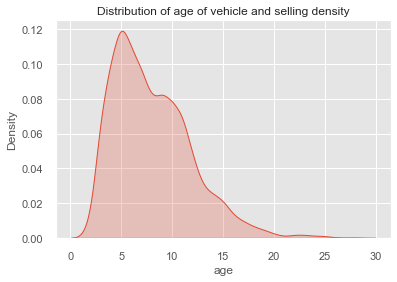

In [581]:
sns.set_context('notebook')
sns.kdeplot(df['age'], shade = True)
plt.title('Distribution of age of vehicle and selling density');

**Observation :**
- From the plot above we can see that the selling of vehicle when its age is 5 is at the peak. 

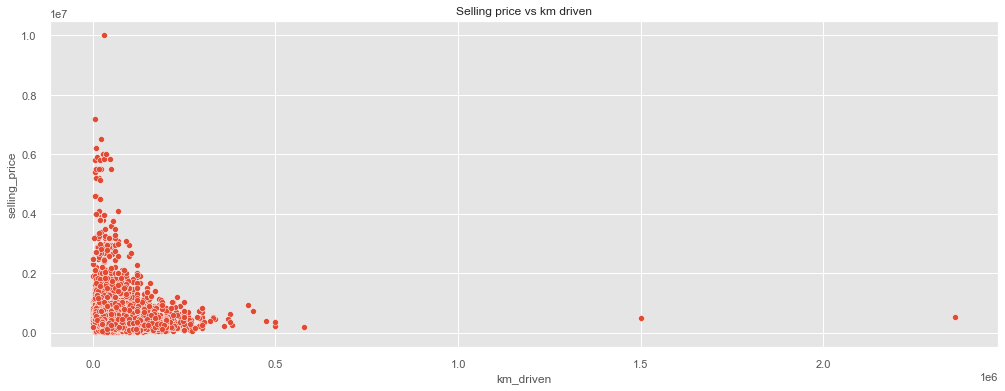

In [580]:
# Selleing price vs km_driven
plt.figure(figsize = (17, 6))
sns.set_context('notebook')
sns.scatterplot(y = df['selling_price'], x = df['km_driven'])
plt.title('Selling price vs km driven');

**Observation :**
- x-axis represents km diven in lakh.
- y-axis represents sellling price in lakh

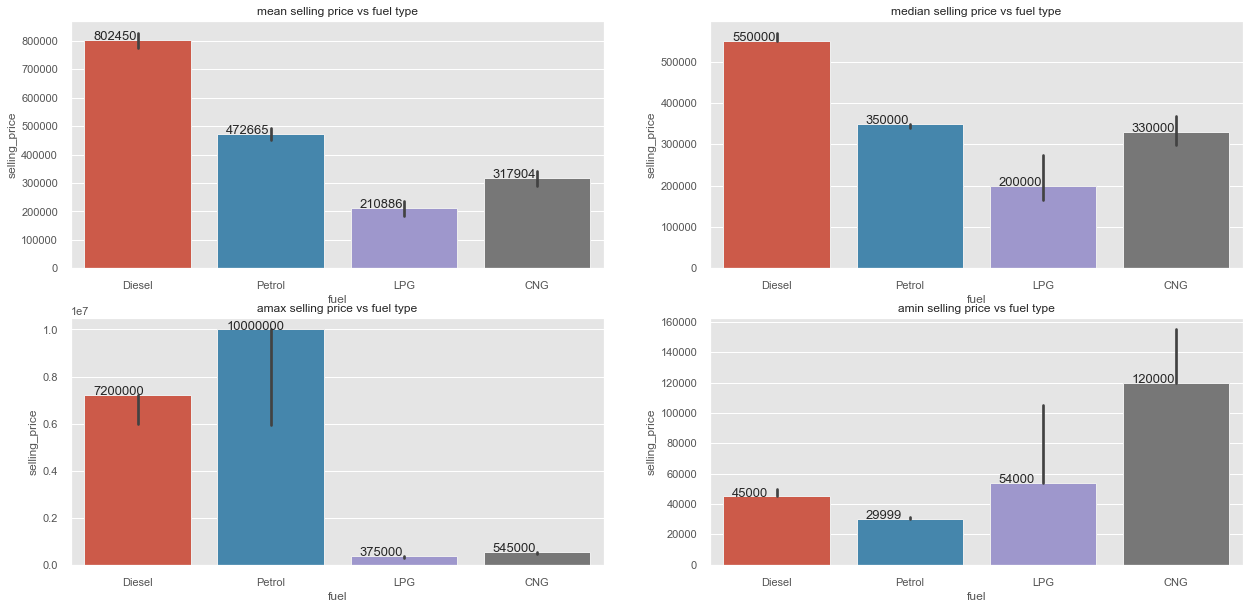

In [582]:
# selling price vs fuel
plt.figure(figsize = (21, 10))

for n,i in enumerate([np.mean, np.median, np.max, np.min]):
    plt.subplot(2, 2, n+1)
    plots = sns.barplot(x = df['fuel'], y = df['selling_price'], estimator = i);
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '0.0f'),
                  (bar.get_x() + bar.get_width()/12, bar.get_height()),
                   size = 13)
    txt = '{var:} selling price vs fuel type'    
    plt.title(txt.format(var = str(i).split()[1]));

**Observation :**
- From the plot above we see the mean, median, max and min selling price by fuel type.
- We see that mean and meadian the distribution is almost similar. However, when it comes to max and min selling price Petrol vehicle is having the max and min selling price.

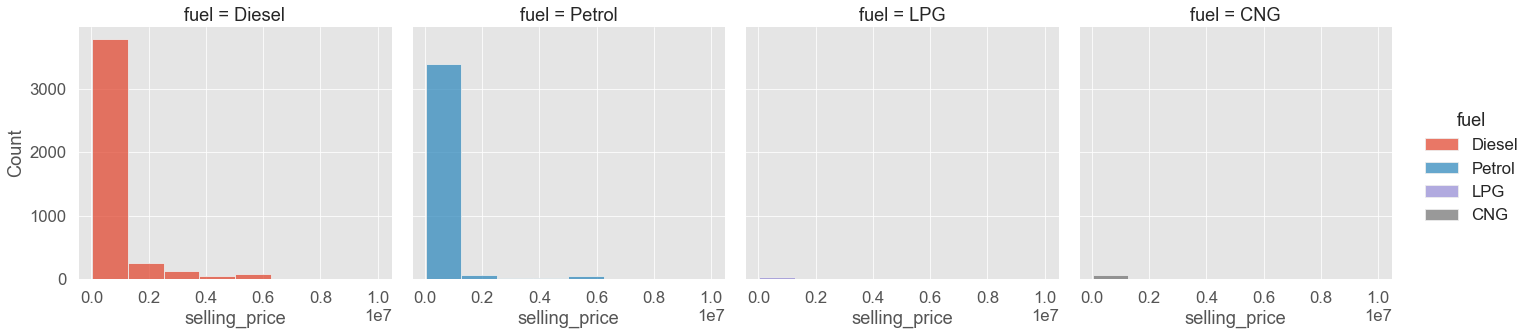

In [583]:
sns.set_context('paper', font_scale = 1.9)
sns.displot(data = df, x = df['selling_price'], hue = 'fuel', col= "fuel", bins = 8);

**Observation :** 
- The x-axis represents the selling price in Lakh. 
- So from the plot above we can say that there are more vehicle having fuel type Petrol and Deisel than LPG and CNG which have been sold.
- Moreover, the selling price of vehicles having fuel type Petrol and Diesel is between 0 to 6 Lakh. On the other hand, vehicles sold having fuel type LPG and CNG are having selling price between 0 to 2 lakhs.

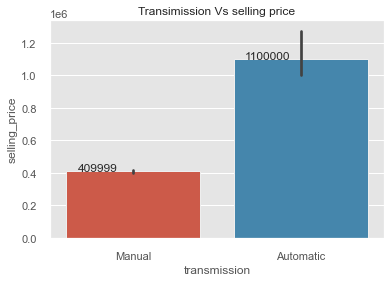

In [585]:
# Selling price VS transmission
sns.set_context('notebook')
plots = sns.barplot(x = df['transmission'], y = df['selling_price'], estimator = np.median)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                  (bar.get_x() + bar.get_width()/12, bar.get_height()),
                  size = 12)
plt.title('Transimission Vs selling price');

**Observation :**
- From the plot above we see the median selling price of manual transmission and Autometic transmission.
- Here the median selling price for automatic transmission is significantly higher than the manual transmission.

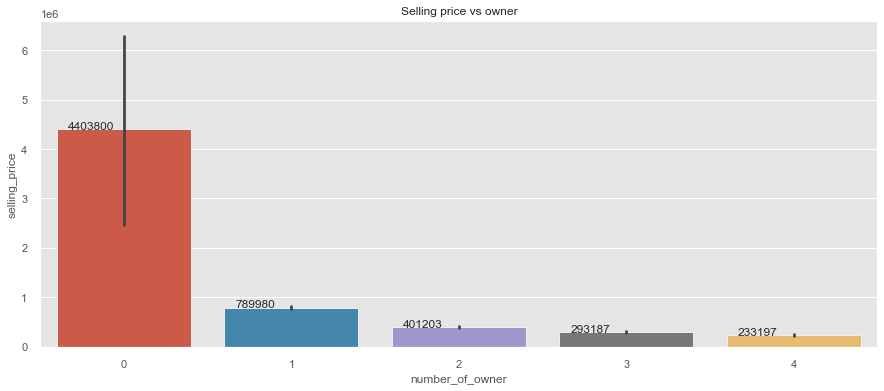

In [586]:
# Selling price vs Owner
plt.figure(figsize = (15,6))
sns.set_context('notebook')
plots = sns.barplot(x = df['number_of_owner'], y = df['selling_price'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                  (bar.get_x() + bar.get_width()/12, bar.get_height()),
                  size = 12)
plt.title('Selling price vs owner');    

**Observation :**
- From the graph above we can see the mean selling price by owner.
- We can say that as the number of owner increases the selling price decreases and for test drive car we have the highesr mean selling price.

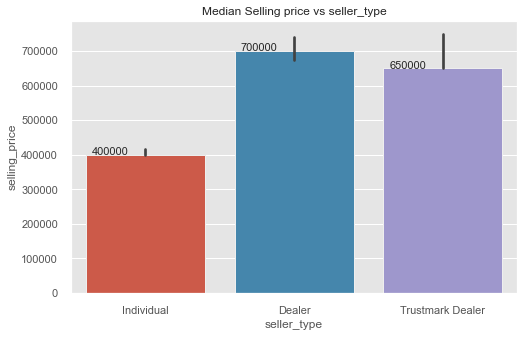

In [587]:
#Seller tyep vs selling price
plt.figure(figsize = (8, 5))
plots = sns.barplot(x = df['seller_type'], y = df['selling_price'], estimator = np.median)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                  (bar.get_x() + bar.get_width()/20, bar.get_height()),
                  size = 11)
plt.title('Median Selling price vs seller_type');

**Observation :**
-  So from the graph above we see that the Dealers are having the highest medain selling price, while ther is not sugnificant difference between Dealer and Trustman dealer, However, we see ther eis significant difference between Individual sellar and other two seller type

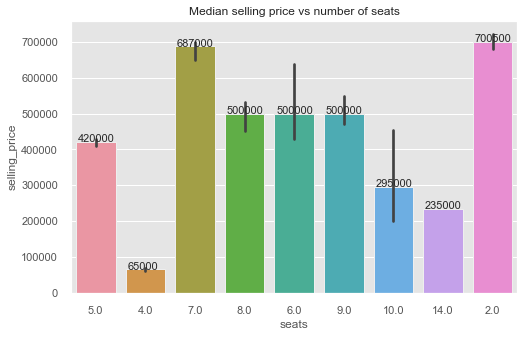

In [588]:
plt.figure(figsize = (8, 5))
plots = sns.barplot(x = df['seats'], y = df['selling_price'], estimator = np.median)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                  (bar.get_x() + bar.get_width()/20, bar.get_height()),
                  size = 11)
plt.title('Median selling price vs number of seats');

**Observation :**
- So from the graph above see that the median selling price for car having 2 seats is the highest. These vehicles might be super cars or sports cars.
-  After that we see the growth of selling price from 4 seter to 7 seater but beyound 7 setter we see that the selling price is dropping down.

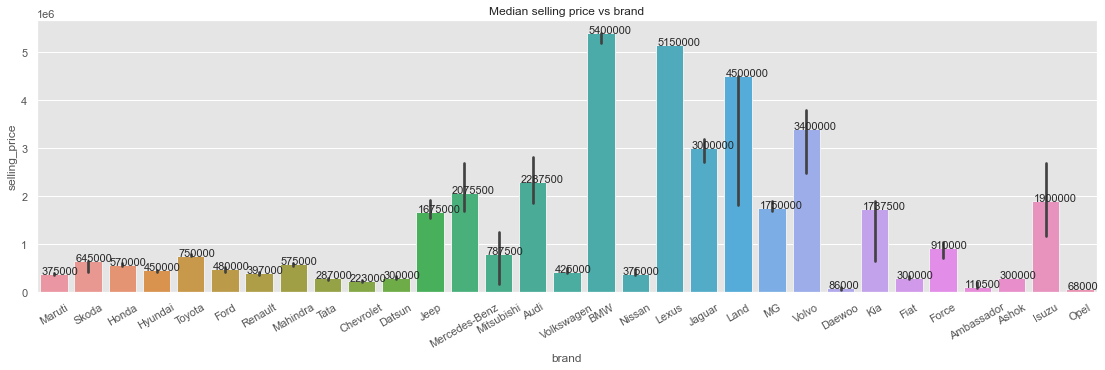

In [271]:
plt.figure(figsize = (19, 5))
plots = sns.barplot(x = df['brand'], y = df['selling_price'], estimator = np.median)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                  (bar.get_x() + bar.get_width()/20, bar.get_height()),
                  size = 11)
plots.set_xticklabels(plots.get_xticklabels(), rotation  = 30)    
plt.title('Median selling price vs brand');

**Observation :**
- Form the plot above we see that median selling price for BMW is the highest followed by Lexus, Land, Volvo, and so on. 

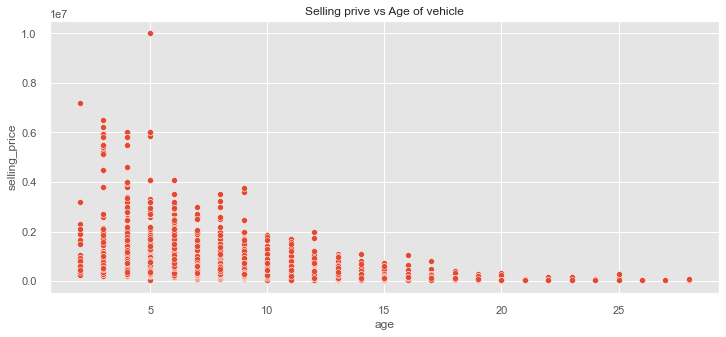

In [589]:
## Selling price vs age
plt.figure(figsize = (12, 5))
sns.scatterplot(x = df['age'], y = df['selling_price']);
plt.title('Selling prive vs Age of vehicle');

**Observation :**
- So we can see that there is inverse corealtion between selling price and age of the vehicle.

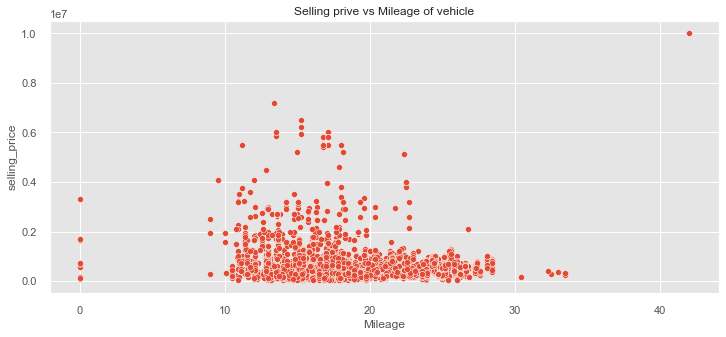

In [590]:
## Selling price vs age
plt.figure(figsize = (12, 5))
sns.scatterplot(x = df['Mileage'], y = df['selling_price']);
plt.title('Selling prive vs Mileage of vehicle');

**Observation :**
- From the plot above we see that there is no relation between selling price and mileage of the vehicle.

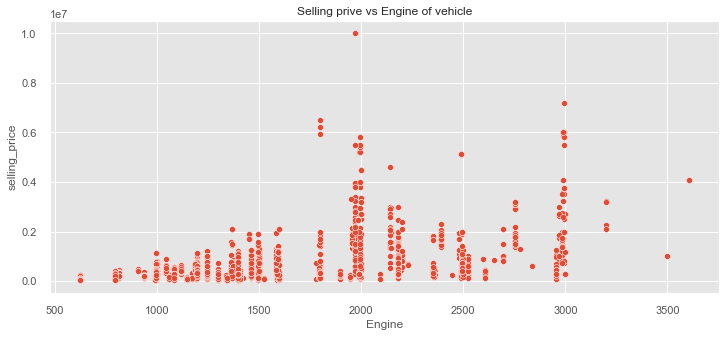

In [591]:
## Selling price vs age
plt.figure(figsize = (12, 5))
sns.scatterplot(x = df['Engine'], y = df['selling_price']);
plt.title('Selling prive vs Engine of vehicle');

**Observation :**
- We see that there is slight positive coreation between engine and selling price of vehicle.

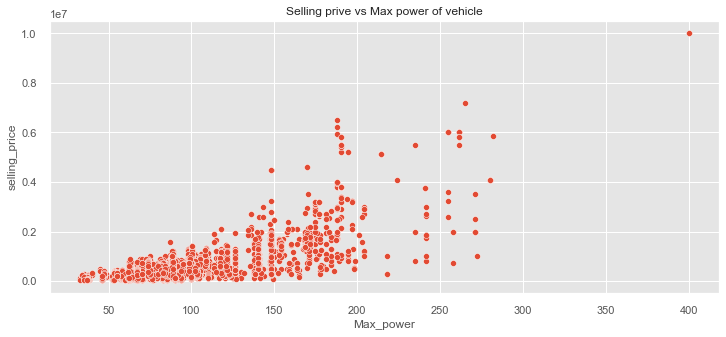

In [592]:
## Selling price vs age
plt.figure(figsize = (12, 5))
sns.scatterplot(x = df['Max_power'], y = df['selling_price']);
plt.title('Selling prive vs Max power of vehicle');

**Observation :**
- So we see that there is a positive corelation between selling price and max poer of vehicle.

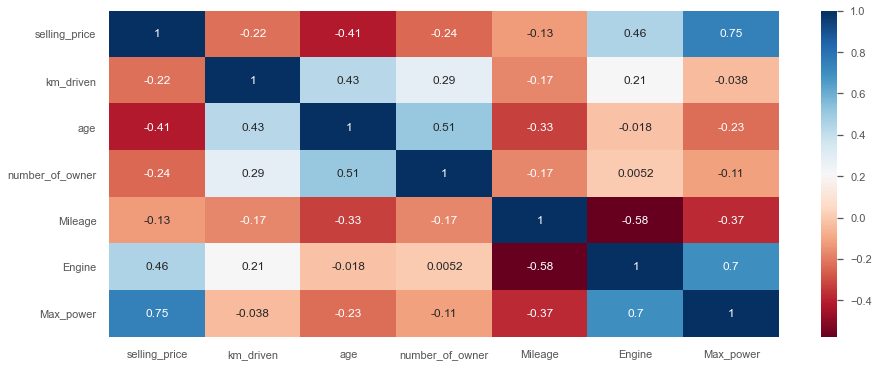

In [594]:
## Corelarion
plt.figure(figsize = (15, 6))
sns.heatmap(df.corr(), annot = True, cmap="RdBu");

**Observation :**
- So we see that there is a good correlation between engine, max_power and age, so we shall thake only those features.

### Outlier detection and handling

In [480]:
## Creating a list of numerical features
numerical_variables = [i for i in df.columns if df[i].dtype != 'O']

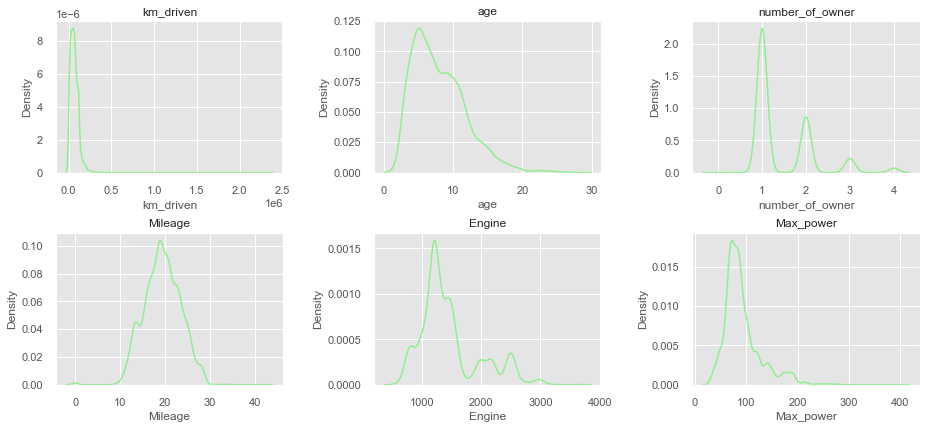

In [595]:
# Checking skewness of data
plt.figure(figsize = (15, 10))
for n,i in enumerate(numerical_variables):
    plt.subplot(3, 3, n+1)
    ax = sns.kdeplot(df[i], color = 'lightgreen')
    plt.title(i)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    

**Observation :**
- From the graphs above we see that most of the features are right skewed so we can apply log transformation on that.
- This will reduce skewness and might reduce the outliers.

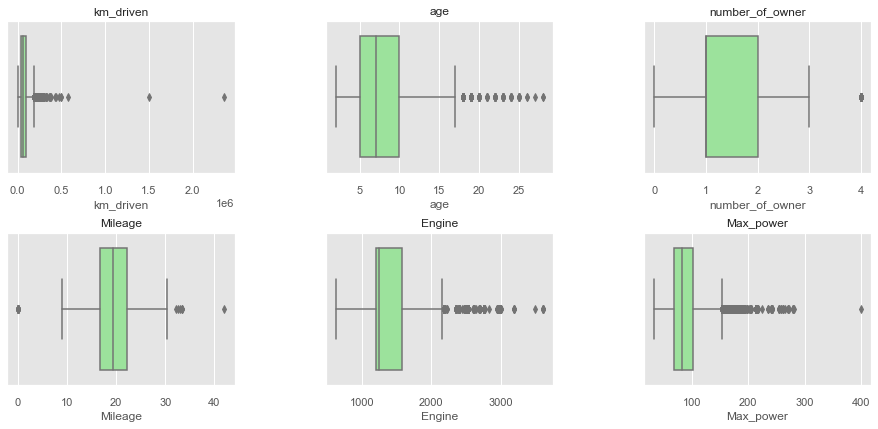

In [596]:
# Boxplot of numerical features
plt.figure(figsize = (15, 10))
for n,i in enumerate(numerical_variables):
    plt.subplot(3, 3, n+1)
    ax = sns.boxplot(df[i], color = 'lightgreen')
    plt.title(i)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

**Observation :**
- Now we see that thery are so many outliers in engine and mox power that might be because these are super cars.
- So we can drop these cars and then we can make another model for these cars if we need.
- There are slsw outliers in selling price we shall drop record with the oultiers in selling price beacuse these might be exceptional conditions or might be super cars.

#### Droping records with outliers in selling price 

In [484]:
# IQR selling price
iqr = np.quantile(df['selling_price'], 0.75) - np.quantile(df['selling_price'], 0.25)
ub = np.quantile(df['selling_price'], 0.75) + 1.5*(iqr)
lb = np.quantile(df['selling_price'], 0.25) - 1.5*(iqr)
print('upperbound for engine', ub)
print('lowerbound for engine', lb)

upperbound for engine 1320000.0
lowerbound for engine -360000.0


In [490]:
# droping sales_price records with outliers
df = df.drop(df[df['selling_price']>ub].index)

#### IQR 

#### Applying capping on Engine

In [492]:
## IQR for engine
iqr = np.quantile(df['Engine'], 0.75) - np.quantile(df['Engine'], 0.25)
ub = np.quantile(df['Engine'], 0.75) + 1.5*(iqr)
lb = np.quantile(df['Engine'], 0.25) - 1.5*(iqr)
print('upperbound for engine', ub)
print('lowerbound for engine', lb)

upperbound for engine 1949.5
lowerbound for engine 745.5


In [493]:
df[df['Engine']>ub]

,selling_price,km_driven,fuel,seller_type,transmission,seats,brand,age,number_of_owner,Mileage,Engine,Max_power
39,425000,60000,Diesel,Individual,Manual,7.0,Tata,11,2,13.93,2179.0,138.03
48,700000,99000,Diesel,Dealer,Manual,7.0,Toyota,9,1,12.99,2494.0,100.00
51,1090000,151000,Diesel,Dealer,Manual,7.0,Mitsubishi,9,1,13.50,2477.0,175.56
56,950000,99000,Diesel,Dealer,Manual,7.0,Toyota,6,1,12.99,2494.0,100.60
80,1200000,140000,Diesel,Individual,Manual,8.0,Toyota,6,1,12.99,2494.0,100.60
...,...,...,...,...,...,...,...,...,...,...,...,...
8080,300000,100000,Diesel,Individual,Manual,7.0,Tata,12,1,11.57,2179.0,138.10
8083,300000,100000,Diesel,Individual,Manual,7.0,Chevrolet,14,2,11.50,1991.0,147.90
8085,300000,40000,Diesel,Individual,Manual,5.0,Chevrolet,11,1,18.30,1991.0,147.90
8099,750000,120000,Diesel,Individual,Manual,7.0,Mahindra,9,1,15.10,2179.0,140.00


In [494]:
## Capping engine 
df['Engine'] = np.where(df['Engine'] > ub, ub, df['Engine'])

#### Applying capping on Max_power

In [495]:
## IQR for max power
iqr = np.quantile(df['Max_power'], 0.75) - np.quantile(df['Max_power'], 0.25)
ub = np.quantile(df['Max_power'], 0.75) + 1.5*(iqr)
lb = np.quantile(df['Max_power'], 0.25) - 1.5*(iqr)
print('upperbound for max power', ub)
print('lowerbound for max power', lb)

upperbound for max power 144.5
lowerbound for max power 22.10000000000001


In [496]:
## Capping maxpower 
df['Max_power'] = np.where(df['Max_power'] > ub, ub, df['Max_power'])

#### Applying capping on Mileage

In [497]:
# IQR for mileage
iqr = np.quantile(df['Mileage'], 0.75) - np.quantile(df['Mileage'], 0.25)
ub = np.quantile(df['Mileage'], 0.75) + 1.5*(iqr)
lb = np.quantile(df['Mileage'], 0.25) - 1.5*(iqr)
print('upperbound for Mileage', ub)
print('lowerbound for Mileage', lb)

upperbound for Mileage 30.849999999999998
lowerbound for Mileage 8.690000000000001


In [498]:
## Capping Mileage
df['Mileage'] = np.where(df['Mileage'] > ub, ub, np.where(df['Mileage'] < lb, lb, df['Mileage']))

#### Applying capping on age

In [499]:
# Iqr for age
iqr = np.quantile(df['age'], 0.75) - np.quantile(df['age'], 0.25)
ub = np.quantile(df['age'], 0.75) + 1.5*(iqr)
lb = np.quantile(df['age'], 0.25) - 1.5*(iqr)
print('upperbound for age', ub)
print('lowerbound for age', lb)

upperbound for age 20.0
lowerbound for age -4.0


In [500]:
## Capping age 
df['age'] = np.where(df['age'] > ub, ub, df['age'])

#### Applying capping on km_driven

In [501]:
## Iqr for km_driven
iqr = np.quantile(df['km_driven'], 0.75) - np.quantile(df['km_driven'], 0.25)
ub = np.quantile(df['km_driven'], 0.75) + 1.5*(iqr)
lb = np.quantile(df['km_driven'], 0.25) - 1.5*(iqr)
print('upperbound for km_driven', ub)
print('lowerbound for km_driven', lb)

upperbound for km_driven 197500.0
lowerbound for km_driven -62500.0


In [502]:
# Capping km_driven
df['km_driven'] = np.where(df['km_driven'] > ub, ub, df['km_driven'])

#### Checking the boxplots of numerical variables again

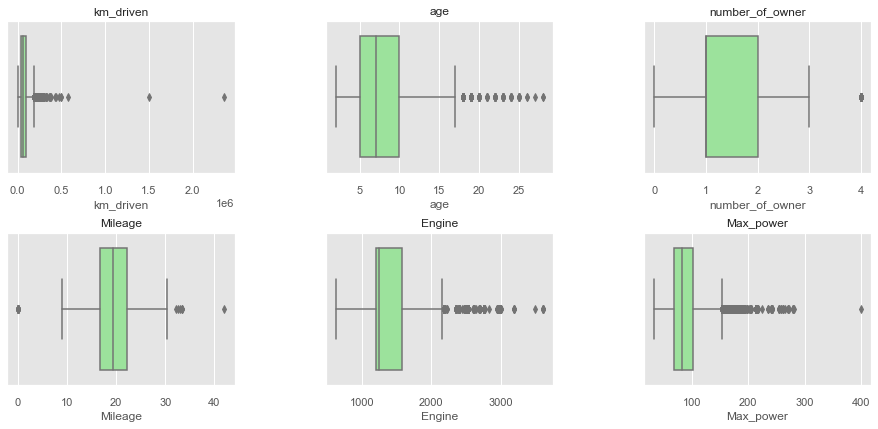

In [597]:
plt.figure(figsize = (15, 10))
for n,i in enumerate(numerical_variables):
    plt.subplot(3, 3, n+1)
    ax = sns.boxplot(df[i], color = 'lightgreen')
    plt.title(i)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

**Observation :**
- So we see, there are no outliers in independent numerical varibles. 

### Encoding variables

In [504]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [505]:
# label encoding brand
df['brand']= lbe.fit_transform(df['brand'].values.reshape(-1, 1))

In [506]:
# Converting string of seats to float
df['seats'] = df['seats'].astype('float')
df['seats'].dtype

dtype('float64')

In [507]:
## Applying one hot encoding on fuel, seller_type and transmission
df = pd.get_dummies(df, drop_first = True)

### Train test split

In [508]:
x = df.drop('selling_price', axis = 1)
y = df['selling_price']

In [509]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 34)
print('Shape of x_train', x_train.shape)
print('Shape of y_train', y_train.shape, '\n\n')

print('Shape of x_test', x_test.shape)
print('Shape of y_test', y_test.shape)

Shape of x_train (5481, 14)
Shape of y_train (5481,) 


Shape of x_test (1827, 14)
Shape of y_test (1827,)


### Scaling

In [510]:
numerical_variables.remove('selling_price')

In [511]:
numerical_variables

['km_driven', 'age', 'number_of_owner', 'Mileage', 'Engine', 'Max_power']

In [512]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()

In [513]:
x_train = pd.DataFrame(msc.fit_transform(x_train), columns = x_train.columns)    
x_test = pd.DataFrame(msc.fit_transform(x_test), columns = x_test.columns)

### Model Creation and evaluation 




- Applying regression models
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regression
- Gradient Boosting regression

In [605]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score

In [546]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model, model_name):
    # Training model
    model.fit(x_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(x_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(x_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,x_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
     # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (13,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('Residual')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Standard Linear Regression or Ordinary Least Squares


Train R2-score : 0.7
Test R2-score : 0.69
Train CV scores : [0.70176684 0.70548171 0.69370314 0.69794648 0.70315214]
Train CV mean : 0.7


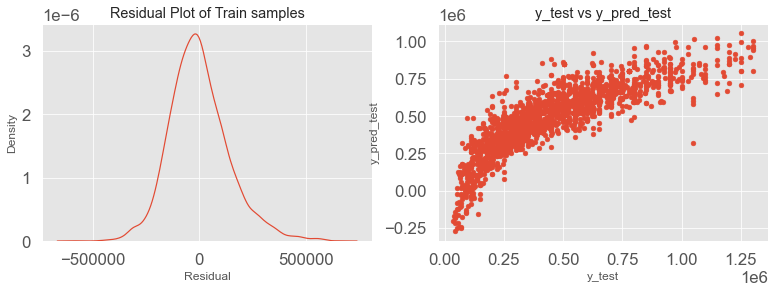

In [547]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

#### Ridge

Train R2-score : 0.7
Test R2-score : 0.69
Train CV scores : [0.70194177 0.70550798 0.69367513 0.69794575 0.70309255]
Train CV mean : 0.7


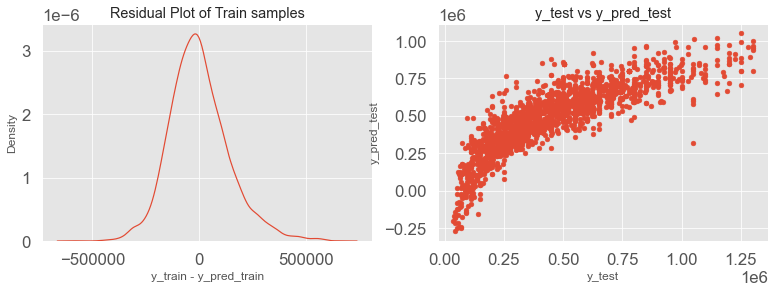

In [545]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

#### Lasso

In [548]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.7
Test R2-score : 0.69
Train CV scores : [0.70178763 0.70547474 0.69368867 0.69788655 0.70315305]
Train CV mean : 0.7


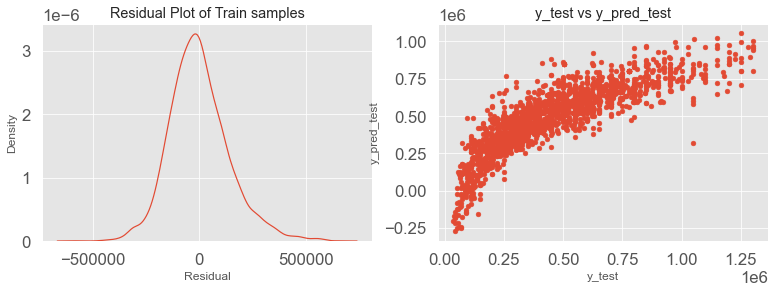

In [549]:
car_pred_model(ls_rs,"lasso.pkl")

#### Random Forest regressor

In [551]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(3, 9, 2))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.85
Test R2-score : 0.78
Train CV scores : [0.86575289 0.86258462 0.87161697 0.85876233 0.86781137]
Train CV mean : 0.87


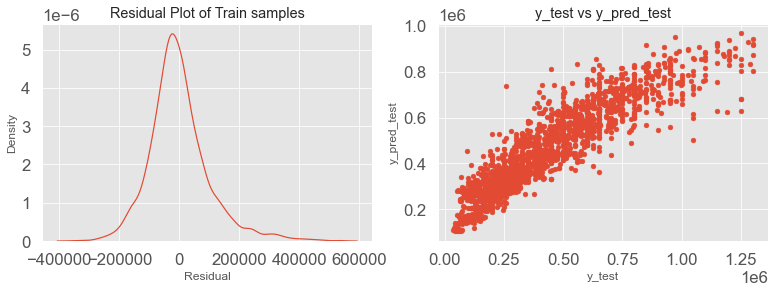

In [552]:
car_pred_model(rf_rs,'random_forest.pkl')

In [553]:
## Best estimators
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=8, n_estimators=500)


#### Gradient Boosting

In [554]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']


# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 0.96
Test R2-score : 0.8
Train CV scores : [0.91160888 0.90248157 0.90574154 0.89427587 0.9056265 ]
Train CV mean : 0.9


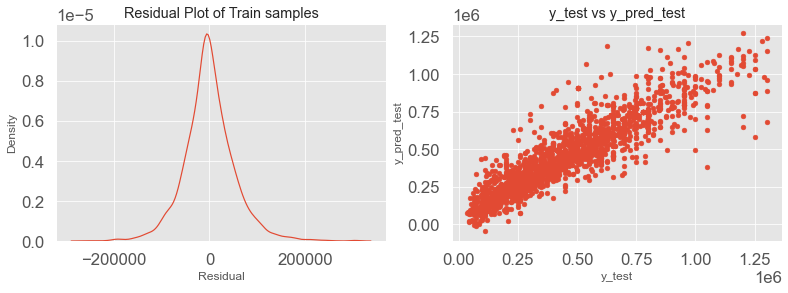

In [555]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

#### Comparing results of all the models

In [560]:
CV

[0.7, 0.7, 0.87, 0.9]

In [562]:
Technique = ["Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,Ridge,0.70,0.69,0.70
1,Lasso,0.70,0.69,0.70
2,RandomForestRegressor,0.85,0.78,0.87
3,GradientBoostingRegressor,0.96,0.80,0.90


**Observation :**
- From the chart aboce we can see that even though Random Forest and GradientBoost are having high training scores but they are not having poor performance in test data.
- This means that these models are overfitting.
- So we shall select Rigde or Lasso both of them are giving same performance and they are well generalised.